In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
with open('df_g_yellow_14.pkl','rb') as picklefile:
    df_y = pickle.load(picklefile)

In [3]:
with open('df_green_vf.pkl', 'rb') as picklefile:
    df_green_vf = pickle.load(picklefile)

In [4]:
df_g = df_green_vf.groupby(['census_tract','day_of_week','hour']).sum().reset_index()

In [5]:
with open('df_uber_vf.pkl', 'rb') as picklefile:
    df_uber_vf = pickle.load(picklefile)

In [6]:
df_u = df_uber_vf.groupby(['census_tract','day_of_week','hour']).sum().reset_index()

In [7]:
print(df_y.shape)
print(df_g.shape)
print(df_u.shape)

(194105, 9)
(206471, 10)
(163769, 8)


In [8]:
def four(x):
    if x >= 0 and x < 4:
        return "a.0-4"
    elif x >= 4 and x < 8:
        return "b.4-8"
    elif x >= 8 and x < 12:
        return "c.8-12"
    elif x >= 12 and x < 16:
        return "d.12-16"
    elif x >= 16 and x < 20:
        return "e.16-20"
    else:
        return "f.20-24"

In [9]:
df_y.hour = df_y.hour.astype(int)
df_g.hour = df_g.hour.astype(int)
df_u.hour = df_u.hour.astype(int)

In [10]:
df_y.rename(columns = {'rides':'rides_y'},inplace=True)
df_g.rename(columns = {'ride':'rides_g'},inplace=True)
df_u.rename(columns = {'rides':'rides_u'},inplace=True)

In [11]:
df_y['timeslot'] = df_y['hour'].apply(four)
df_g['timeslot'] = df_g['hour'].apply(four)
df_u['timeslot'] = df_u['hour'].apply(four)

### Aggregate by hour and day of week

In [12]:
df_y = df_y.drop(['census_tract', 'passenger_count',
       'trip_distance', 'tip_amount', 'total_amount', 'year'],axis=1)

In [13]:
df_g = df_g.drop(['census_tract', 'Pickup_longitude','Pickup_latitude',
                  'Passenger_count', 'Trip_distance', 'Total_amount','year'],axis=1)

In [14]:
df_u = df_u.drop(['census_tract', 'Lat', 'Lon', 'year', 'month'],axis=1)

In [15]:
df_y_hour = df_y.groupby(['day_of_week','hour'],as_index=False).sum()
df_g_hour = df_g.groupby(['day_of_week','hour'],as_index=False).sum()
df_u_hour = df_u.groupby(['day_of_week','hour'],as_index=False).sum()

In [16]:
df_y_hour.sort_values(by=['day_of_week','hour'],inplace=True)
df_g_hour.sort_values(by=['day_of_week','hour'],inplace=True)
df_u_hour.sort_values(by=['day_of_week','hour'],inplace=True)

In [17]:
print(len(df_y_hour))
print(len(df_g_hour))
print(len(df_u_hour))

168
168
168


In [18]:
df_y_hour['rides_g'] = df_g_hour.rides_g
df_y_hour['rides_u'] = df_u_hour.rides_u

In [19]:
df_y_hour['total'] = df_y_hour.rides_y + df_y_hour.rides_g + df_y_hour.rides_u
df_y_hour['y_share'] = df_y_hour.rides_y / df_y_hour.total
df_y_hour['g_share'] = df_y_hour.rides_g / df_y_hour.total
df_y_hour['u_share'] = df_y_hour.rides_u / df_y_hour.total

In [20]:
df_consol_hour = df_y_hour

In [21]:
df_consol_hour.head()

,day_of_week,hour,rides_y,rides_g,rides_u,total,y_share,g_share,u_share
0,0,0,264877,40395,6436,311708,0.849760,0.129592,0.020648
1,0,1,162614,27492,3737,193843,0.838895,0.141826,0.019278
2,0,2,107654,18464,2938,129056,0.834165,0.143070,0.022765
3,0,3,74040,13595,6232,93867,0.788776,0.144833,0.066392
4,0,4,77606,13779,9640,101025,0.768186,0.136392,0.095422


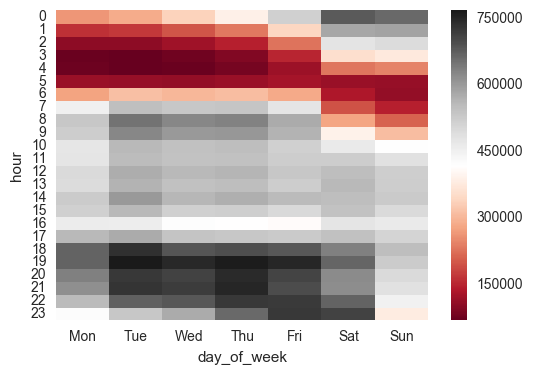

In [24]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='rides_y',index='hour',columns='day_of_week',aggfunc=np.sum)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'RdGy',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

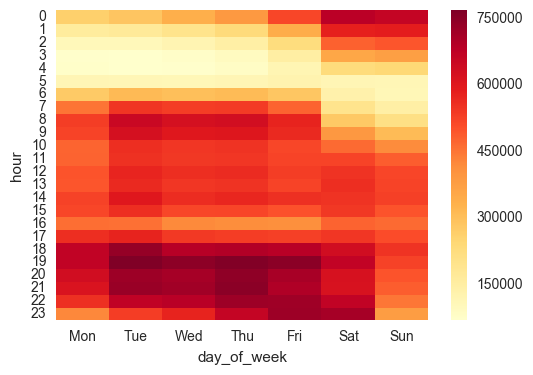

In [289]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='total',index='hour',columns='day_of_week',aggfunc=np.sum)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'YlOrRd',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

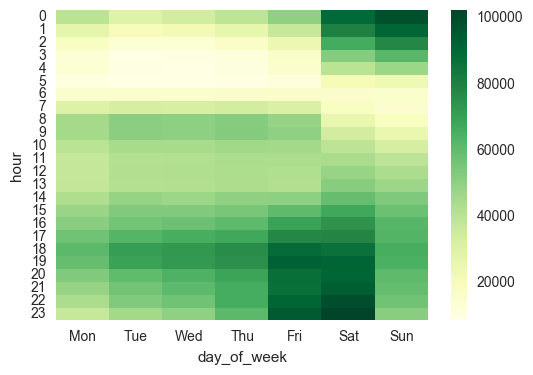

In [290]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='rides_g',index='hour',columns='day_of_week',aggfunc=np.sum)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'YlGn',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

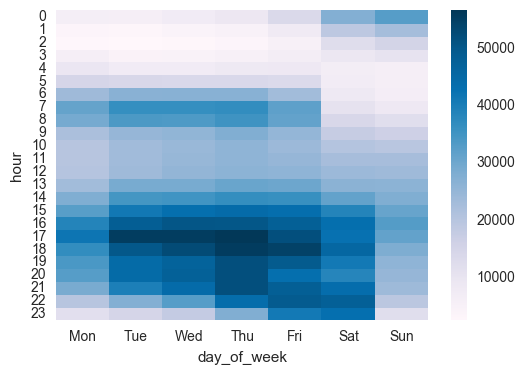

In [292]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='rides_u',index='hour', columns = 'day_of_week',aggfunc=np.sum)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'PuBu',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

### Marketshare view

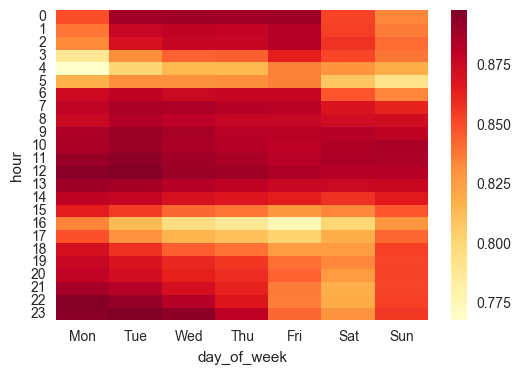

In [299]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='y_share',index='hour',columns='day_of_week',aggfunc=np.mean)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'YlOrRd',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

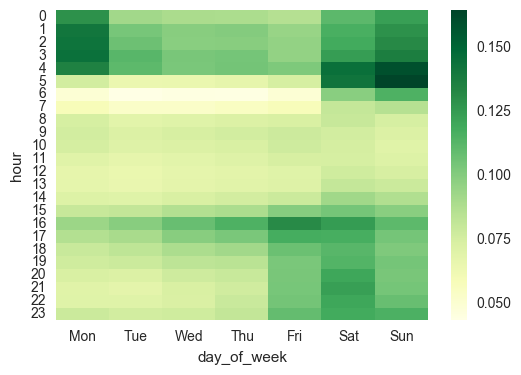

In [300]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='g_share',index='hour',columns='day_of_week',aggfunc=np.sum)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'YlGn',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

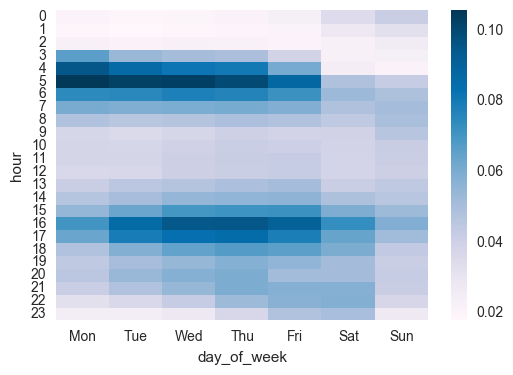

In [297]:
day_hour_piv_hour = df_consol_hour.pivot_table(values='u_share',index='hour', columns = 'day_of_week',aggfunc=np.mean)

heatmap = sb.heatmap(day_hour_piv_hour, cmap = 'PuBu',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

## CT by day of week

In [187]:
df_g.columns

Index(['census_tract', 'day_of_week', 'hour', 'Pickup_longitude',
       'Pickup_latitude', 'Passenger_count', 'Trip_distance', 'Total_amount',
       'year', 'rides_g', 'timeslot'],
      dtype='object')

In [191]:
df_u.head()

,day_of_week,rides_u,timeslot
0,2,1,f.20-24
1,3,1,d.12-16
2,3,1,d.12-16
3,3,1,e.16-20
4,4,1,a.0-4


In [192]:
df_y_ts = df_y.groupby(['day_of_week','timeslot'],as_index=False).sum()
df_g_ts = df_g.groupby(['day_of_week','timeslot'],as_index=False).sum()
df_u_ts = df_u.groupby(['day_of_week','timeslot'],as_index=False).sum()

In [193]:
df_y_ts.sort_values(by=['day_of_week','timeslot'],inplace=True)
df_g_ts.sort_values(by=['day_of_week','timeslot'],inplace=True)
df_u_ts.sort_values(by=['day_of_week','timeslot'],inplace=True)

In [228]:
df_y_ts['rides_g'] = df_g_ts.rides_g
df_y_ts['rides_u'] = df_u_ts.rides_u

In [196]:
df_consol_ts = df_y_ts

In [198]:
df_consol_ts['total'] = df_consol_ts.rides_y + df_consol_ts.rides_g + df_consol_ts.rides_u
df_consol_ts['uber_share'] = df_consol_ts.rides_u / df_consol_ts.total

In [199]:
df_consol_ts.head()

,day_of_week,timeslot,rides_y,rides_g,rides_u,total,uber_share
0,0,a.0-4,609185,99946,19343,728474,0.026553
1,0,b.4-8,924649,70674,79577,1074900,0.074032
2,0,c.8-12,2010981,169153,92083,2272217,0.040526
3,0,d.12-16,2043236,167105,104774,2315115,0.045256
4,0,e.16-20,2363824,230171,151952,2745947,0.055337


In [204]:
day_hour_piv_ts = df_consol_ts.pivot_table(values='uber_share',index='timeslot', columns = 'day_of_week')
day_hour_piv_ts

day_of_week,0,1,2,3,4,5,6
timeslot,,,,,,,
a.0-4,0.026553,0.023192,0.023774,0.024202,0.024213,0.028012,0.032259
b.4-8,0.074032,0.071014,0.072072,0.071768,0.066760,0.041300,0.037153
c.8-12,0.040526,0.039481,0.041666,0.043462,0.042722,0.039970,0.044051
d.12-16,0.045256,0.049184,0.053136,0.054435,0.055499,0.047356,0.045883
e.16-20,0.055337,0.066279,0.071670,0.073896,0.070258,0.061160,0.048849
f.20-24,0.037314,0.042193,0.046646,0.052895,0.053676,0.054479,0.037947


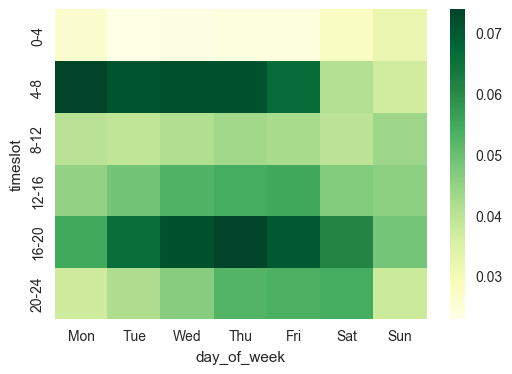

In [216]:
day_hour_piv_ts = df_consol_ts.pivot_table(values='uber_share',index='timeslot', columns = 'day_of_week')

heatmap = sb.heatmap(day_hour_piv_ts, cmap = 'YlGn',
                     yticklabels=['0-4','4-8','8-12','12-16','16-20','20-24'],
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

In [48]:
df_y_day = df_y.groupby(['day_of_week'],as_index=False).sum()

ValueError: labels ['census_tract' 'Pickup_longitude' 'Pickup_latitude' 'Passenger_count'
 'Trip_distance' 'Total_amount' 'year'] not contained in axis

In [49]:
df_y_day.head

,day_of_week,rides
0,0,10186511
1,1,11603466
2,2,11369464
3,3,11769691
4,4,11801483
5,5,11621323
6,6,10126328


In [209]:
df_uber_vf.head()

,datetime,Lat,Lon,year,month,hour,day_of_week,coordinates,census_tract,rides
0,2014-04-01 00:11:00,40.7690,-73.9549,2014,4,0,1,"[40.769, -73.9549]",36061013400,1
1,2014-04-01 00:17:00,40.7267,-74.0345,2014,4,0,1,"[40.7267, -74.0345]",36061031703,1
2,2014-04-01 00:21:00,40.7316,-73.9873,2014,4,0,1,"[40.7316, -73.9873]",36061004000,1
3,2014-04-01 00:28:00,40.7588,-73.9776,2014,4,0,1,"[40.7588, -73.9776]",36061010400,1
4,2014-04-01 00:33:00,40.7594,-73.9722,2014,4,0,1,"[40.7594, -73.9722]",36061010000,1


In [219]:
df_uber_vf['timeslot'] = df_uber_vf['hour'].apply(four)

In [221]:
day_hour_piv_u = df_uber_vf.pivot_table(values='rides',index='hour', columns = 'day_of_week', aggfunc=np.sum)
day_hour_piv_u

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,6436,6237,7644,9293,13716,27633,32877
1,3737,3509,4324,5290,8163,19189,23015
2,2938,2571,3141,3719,5350,12710,15436
3,6232,4494,4855,5637,6930,9542,10597
4,9640,7548,7511,8505,8806,6846,6374
5,15032,14241,13794,14169,13450,7084,6169
6,23746,26872,26943,27065,23412,8579,6596
7,31159,36599,36495,37038,32061,11014,8728
8,29265,33934,33826,35431,31509,14411,12128


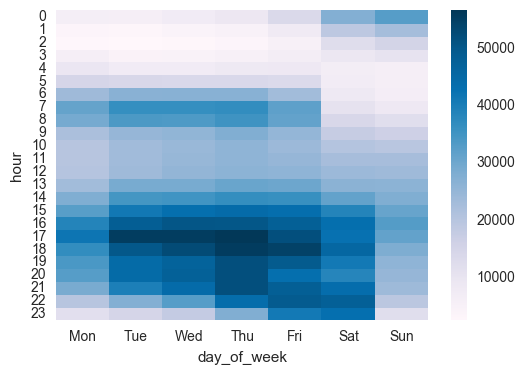

In [226]:
# aggregate - uber

heatmap = sb.heatmap(day_hour_piv_u, cmap = 'PuBu',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()

In [223]:
day_hour_piv_u_ts = df_uber_vf.pivot_table(values='rides',index='timeslot', columns = 'day_of_week', aggfunc=np.sum)
day_hour_piv_u_ts

day_of_week,0,1,2,3,4,5,6
timeslot,,,,,,,
a.0-4,19343,16811,19964,23939,34159,69074,81925
b.4-8,79577,85260,84743,86777,77729,33523,27867
c.8-12,92083,106312,109120,115086,106103,75394,71224
d.12-16,104774,129109,133252,138446,136127,121121,109591
e.16-20,151952,199142,206070,214996,204487,173337,118798
f.20-24,93743,127155,143339,175901,182534,173665,80775


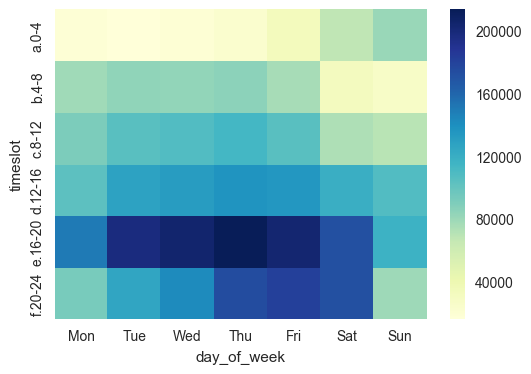

In [225]:
heatmap = sb.heatmap(day_hour_piv_u_ts, cmap = 'YlGnBu',
                     xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plot = heatmap.get_figure()